# K-Means

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [3]:
data, clusters = make_blobs(n_samples= 200, cluster_std=1)

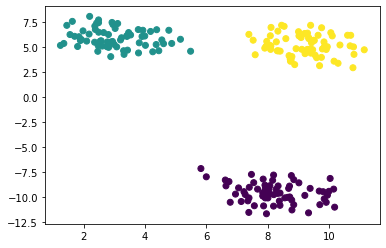

In [4]:
plt.scatter(data[:, 0], data[:, 1], c = clusters)
plt.show()

In [5]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]
        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
        self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, self.labels_))
        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def score(self, X):
        return -self.inertia_

In [6]:
clr = KMeans(n_clusters=3)

In [7]:
predicted_clusters = clr.fit_predict(data)

In [8]:
clr.score(data)

-384.38642890140204

In [9]:
clr.cluster_centers_

[array([3.03392693, 5.86908333]),
 array([ 8.233461  , -9.56262247]),
 array([9.20755701, 5.13330063])]

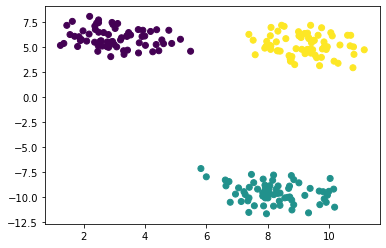

In [10]:
plt.scatter(data[:, 0], data[:, 1], c = predicted_clusters)
plt.show()